In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
pd.DataFrame(data=X_train[1])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,47,79,255,168,0,0,0,0,0,0


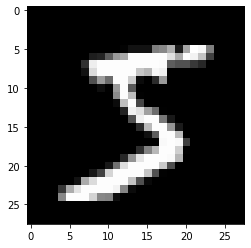

In [ ]:
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))

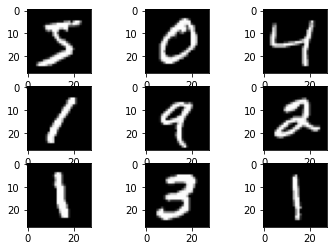

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
# Normalization
X_train=X_train/255
X_test=X_test/255

In [ ]:
pd.DataFrame(data=X_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,...,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,...,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313725,0.611765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
# (length,width,channels)  if colours  channels =3   gray scale  channels =1
# Reshape
X_train=X_train.reshape(-1,28,28,1)
X_Test=X_test.reshape(-1,28,28,1)

In [ ]:
# for the output
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
# one hot encoding
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# build the network
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import TensorBoard
cb=TensorBoard()

In [ ]:
history_callback=model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test),callbacks=cb)

Epoch 1/10
938/938 [==============================] - 19s 11ms/step - loss: 0.1439 - accuracy: 0.9550 - val_loss: 0.0392 - val_accuracy: 0.9872
Epoch 2/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0306 - val_accuracy: 0.9898
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0372 - val_accuracy: 0.9883
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0329 - val_accuracy: 0.9900
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0403 - val_accuracy: 0.9884
Epoch 6/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0501 - val_accuracy: 0.9865
Epoch 7/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0343 - val_accuracy: 0.

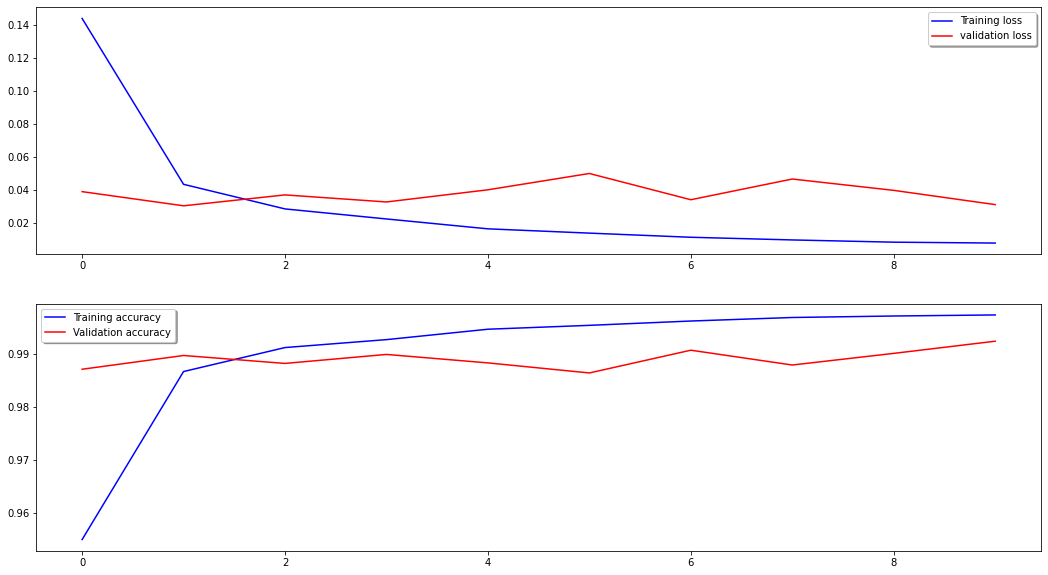

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history_callback.history['loss'], color='b', label="Training loss")
ax[0].plot(history_callback.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_callback.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_callback.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0313 - accuracy: 0.9925


[0.03133023530244827, 0.9925000071525574]

In [ ]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
mat


array([[ 978,    0,    0,    1,    0,    0,    1,    0,    0,    0],
       [   0, 1128,    0,    2,    0,    2,    3,    0,    0,    0],
       [   1,    0, 1027,    0,    0,    0,    1,    3,    0,    0],
       [   0,    0,    0, 1004,    0,    3,    0,    0,    3,    0],
       [   0,    0,    0,    0,  976,    0,    5,    0,    0,    1],
       [   0,    0,    0,    4,    0,  886,    1,    0,    0,    1],
       [   1,    0,    0,    0,    1,    1,  954,    0,    1,    0],
       [   0,    4,    5,    1,    1,    0,    0, 1012,    1,    4],
       [   1,    0,    3,    0,    0,    1,    0,    0,  968,    1],
       [   0,    0,    0,    1,   10,    2,    0,    3,    1,  992]])

<Figure size 720x720 with 0 Axes>

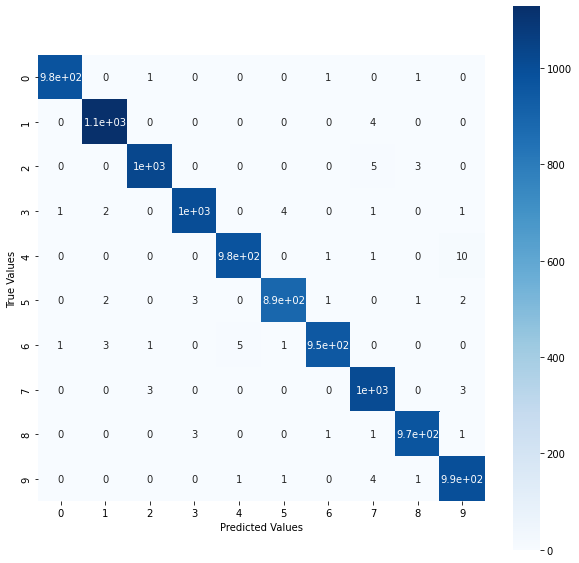

In [ ]:
fig = plt.figure(figsize=(10, 10)) # Set Figure
sns.heatmap(mat.T, square=True, annot=True, cbar=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names= ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']))

              precision    recall  f1-score   support

        Zero       1.00      1.00      1.00       980
         One       1.00      0.99      1.00      1135
         Two       0.99      1.00      0.99      1032
       Three       0.99      0.99      0.99      1010
        Four       0.99      0.99      0.99       982
        Five       0.99      0.99      0.99       892
         Six       0.99      1.00      0.99       958
       Seven       0.99      0.98      0.99      1028
       Eight       0.99      0.99      0.99       974
        Nine       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import PIL
import tensorflow as tf
import pathlib
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)
data_dir=pathlib.Path(data_dir)

228827136/228813984 [==============================] - 3s 0us/step


In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

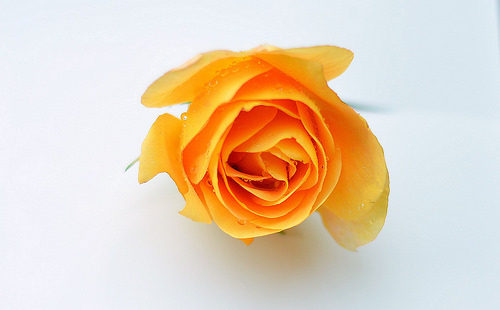

In [ ]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

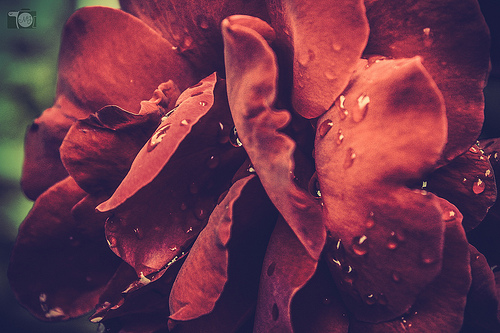

In [ ]:
PIL.Image.open(str(roses[1]))

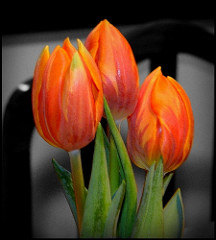

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
batch_size=32
img_height=180
img_width=180

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names=train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

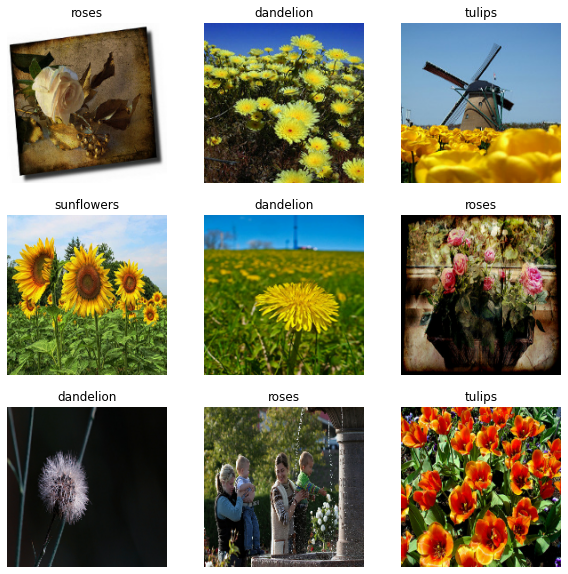

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')


In [ ]:
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE=tf.data.AUTOTUNE

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers
# normalize the images
normalization_layer=layers.Rescaling(1./255)

In [ ]:
normalized_ds=train_ds.map(lambda x,y :(normalization_layer(x),y))
image_batch,labels_batch=next(iter(normalized_ds))

In [ ]:
# build model
num_classes=len(class_names)

model=Sequential([
        layers.Rescaling(1./255,input_shape=(img_height,img_width,3)), 
        layers.Conv2D(16,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(num_classes)


])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs=10
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
92/92 [==============================] - 8s 65ms/step - loss: 1.3255 - accuracy: 0.4421 - val_loss: 1.0853 - val_accuracy: 0.5531
Epoch 2/10
92/92 [==============================] - 4s 48ms/step - loss: 0.9892 - accuracy: 0.6168 - val_loss: 0.9824 - val_accuracy: 0.6322
Epoch 3/10
92/92 [==============================] - 4s 47ms/step - loss: 0.7813 - accuracy: 0.7081 - val_loss: 0.9058 - val_accuracy: 0.6417
Epoch 4/10
92/92 [==============================] - 4s 46ms/step - loss: 0.5796 - accuracy: 0.7919 - val_loss: 0.9935 - val_accuracy: 0.6213
Epoch 5/10
92/92 [==============================] - 4s 47ms/step - loss: 0.3522 - accuracy: 0.8784 - val_loss: 1.1553 - val_accuracy: 0.6512
Epoch 6/10
92/92 [==============================] - 4s 47ms/step - loss: 0.2019 - accuracy: 0.9380 - val_loss: 1.4010 - val_accuracy: 0.6104
Epoch 7/10
92/92 [==============================] - 4s 46ms/step - loss: 0.1527 - accuracy: 0.9533 - val_loss: 1.3982 - val_accuracy: 0.6117
Epoch 8/10
92

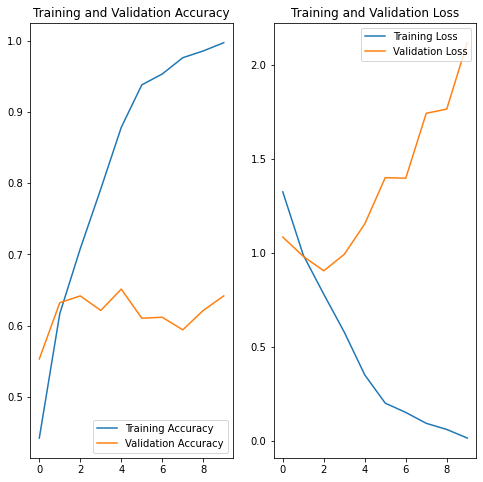

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# overfitting
from tensorflow import keras
data_augmentation=keras.Sequential([
    layers.RandomFlip('horizontal',input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),]
)


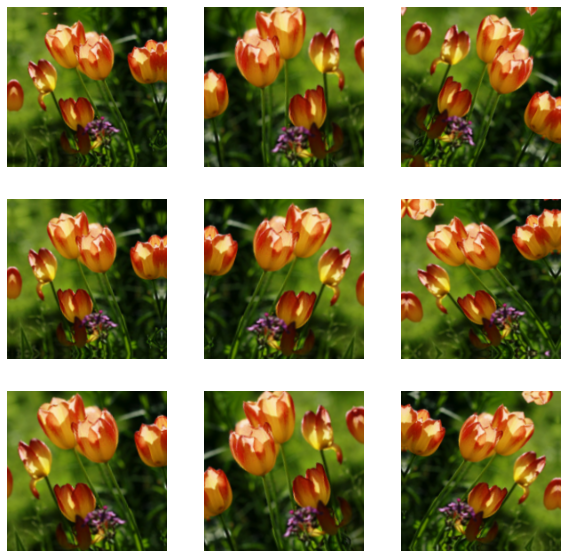

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# build model
num_classes=len(class_names)

model=Sequential([
        data_augmentation,
        layers.Rescaling(1./255,input_shape=(img_height,img_width,3)), 
        layers.Conv2D(16,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(num_classes)


])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs=15
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)


Epoch 1/15
92/92 [==============================] - 8s 56ms/step - loss: 1.2478 - accuracy: 0.4680 - val_loss: 1.1921 - val_accuracy: 0.5559
Epoch 2/15
92/92 [==============================] - 5s 54ms/step - loss: 1.0075 - accuracy: 0.6080 - val_loss: 0.9662 - val_accuracy: 0.6240
Epoch 3/15
92/92 [==============================] - 5s 54ms/step - loss: 0.9405 - accuracy: 0.6335 - val_loss: 1.1633 - val_accuracy: 0.5409
Epoch 4/15
92/92 [==============================] - 5s 53ms/step - loss: 0.8584 - accuracy: 0.6659 - val_loss: 0.8577 - val_accuracy: 0.6757
Epoch 5/15
92/92 [==============================] - 5s 53ms/step - loss: 0.7977 - accuracy: 0.6969 - val_loss: 0.8658 - val_accuracy: 0.6771
Epoch 6/15
92/92 [==============================] - 5s 53ms/step - loss: 0.7549 - accuracy: 0.7156 - val_loss: 0.8477 - val_accuracy: 0.6744
Epoch 7/15
92/92 [==============================] - 5s 53ms/step - loss: 0.7290 - accuracy: 0.7210 - val_loss: 0.8918 - val_accuracy: 0.6526
Epoch 8/15
92

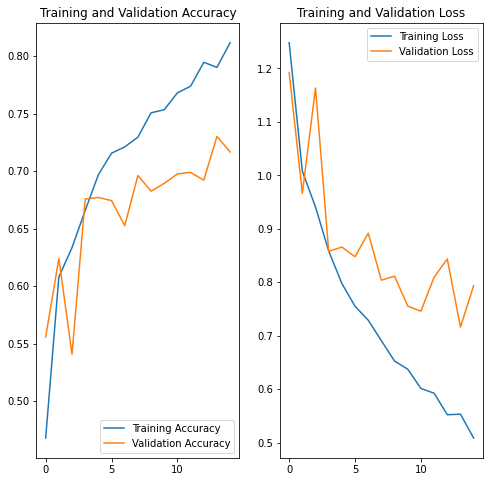

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('flowerclassification.hdf5')